In [173]:
#import all the library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score

In [150]:
#read the dataset
df = pd.read_excel('[MASA Hackathon 2022] Travel Insurance Data Set .xlsx')
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


In [151]:
#Drop unuse Column
df = df.drop(['Agency', 'Agency Type', 'Distribution Channel'], axis=1)
df.head()

,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


In [152]:
#check null value
df.isnull().sum()

Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  45107
Age                         0
dtype: int64

In [153]:
#Turn data into numerical and handle missing value
label_enc = LabelEncoder()
df['Claim'] = label_enc.fit_transform(df['Claim'])
df['Gender'] = label_enc.fit_transform(df['Gender'])
df['Product Name'] = label_enc.fit_transform(df['Product Name'])
df['Destination'] = label_enc.fit_transform(df['Destination'])
df.head()

,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,12,0,186,79,-29.0,9.57,0,81
1,12,0,186,79,-29.0,9.57,0,71
2,16,0,65,4,-49.5,29.70,2,32
3,16,0,60,4,-39.6,23.76,2,32
4,16,0,79,61,-19.8,11.88,2,41


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product Name          63326 non-null  int64  
 1   Claim                 63326 non-null  int64  
 2   Duration              63326 non-null  int64  
 3   Destination           63326 non-null  int64  
 4   Net Sales             63326 non-null  float64
 5   Commision (in value)  63326 non-null  float64
 6   Gender                63326 non-null  int64  
 7   Age                   63326 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 3.9 MB


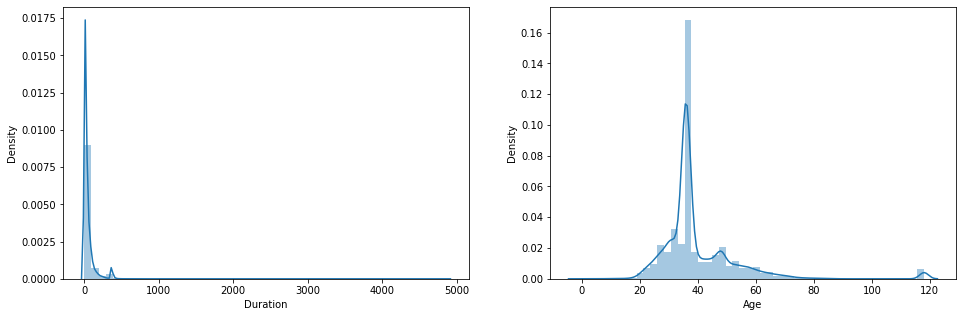

In [156]:
#Search for outliers
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Duration'])
plt.subplot(1,2,2)
sns.distplot(df['Age'])
plt.show()

Duration: 


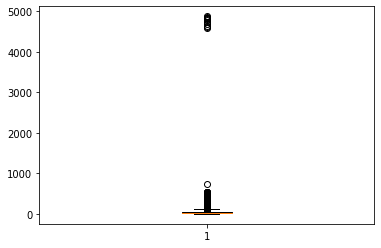

Age: 


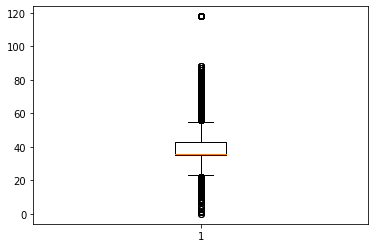

In [157]:
print("Duration: ")
plt.boxplot(df["Duration"])
plt.show()
print("Age: ")
plt.boxplot(df["Age"])
plt.show()

In [158]:
#Check the outlier
Q1=df['Age'].quantile(0.25)
Q3=df['Age'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Age= Q1-(1.5*IQR)
Upper_Age = Q3+(1.5*IQR)
print(Lower_Age, Upper_Age)

35.0
43.0
8.0
23.0 55.0


In [159]:
#Remove the outlier for age column
df = df[(df['Age']<= Upper_Age) & (df['Age'] >= Lower_Age)]
df.head()

,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
2,16,0,65,4,-49.5,29.70,2,32
3,16,0,60,4,-39.6,23.76,2,32
4,16,0,79,61,-19.8,11.88,2,41
5,25,0,66,140,-121.0,42.35,0,44
6,16,0,47,140,-39.6,23.76,2,32


In [160]:
Q1=df['Duration'].quantile(0.25)
Q3=df['Duration'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Dur= Q1-(1.5*IQR)
Upper_Dur = Q3+(1.5*IQR)
print(Lower_Dur, Upper_Dur)

9.0
53.0
44.0
-57.0 119.0


In [161]:
#Remove outlier for duration column
df = df[(df['Duration']<= Upper_Dur) & (df['Duration'] > 0)]
df.head()

,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
2,16,0,65,4,-49.5,29.70,2,32
3,16,0,60,4,-39.6,23.76,2,32
4,16,0,79,61,-19.8,11.88,2,41
5,25,0,66,140,-121.0,42.35,0,44
6,16,0,47,140,-39.6,23.76,2,32


In [162]:
df.shape

(51006, 8)

In [177]:
# Determine X and Y
x = df[['Product Name', 'Duration', 'Destination', 'Gender', 'Age']]
y = df['Claim']

In [179]:
#Split the dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [180]:
#Create function for to find Accuracy of Train and Testing Dataset
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [181]:
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(x_train, y_train)

print_score(lr_clf, x_train, y_train, x_test, y_test, train=True)
print_score(lr_clf, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 98.87%
_______________________________________________
CLASSIFICATION REPORT:
                      0      1  accuracy     macro avg  weighted avg
precision      0.988678    0.0  0.988678      0.494339      0.977483
recall         1.000000    0.0  0.988678      0.500000      0.988678
f1-score       0.994307    0.0  0.988678      0.497153      0.983049
support    40342.000000  462.0  0.988678  40804.000000  40804.000000
_______________________________________________
Confusion Matrix: 
 [[40342     0]
 [  462     0]]

Test Result:
Accuracy Score: 98.73%
_______________________________________________
CLASSIFICATION REPORT:
                      0      1  accuracy     macro avg  weighted avg
precision      0.987257    0.0  0.987257      0.493629      0.974677
recall         1.000000    0.0  0.987257      0.500000      0.987257
f1-score       0.993588    0.0  0.987257      0.496794      0.980927
support    10072.000000  130.0  0.987257  10202.000000  10202.00

In [182]:
#Support Vector Machine Model
from sklearn.svm import SVC


svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(x_train, y_train)

print_score(svm_clf, x_train, y_train, x_test, y_test, train=True)
print_score(svm_clf, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 98.89%
_______________________________________________
CLASSIFICATION REPORT:
                      0           1  accuracy     macro avg  weighted avg
precision      0.988920    1.000000  0.988923      0.994460      0.989045
recall         1.000000    0.021645  0.988923      0.510823      0.988923
f1-score       0.994429    0.042373  0.988923      0.518401      0.983650
support    40342.000000  462.000000  0.988923  40804.000000  40804.000000
_______________________________________________
Confusion Matrix: 
 [[40342     0]
 [  452    10]]

Test Result:
Accuracy Score: 98.73%
_______________________________________________
CLASSIFICATION REPORT:
                      0      1  accuracy     macro avg  weighted avg
precision      0.987257    0.0  0.987257      0.493629      0.974677
recall         1.000000    0.0  0.987257      0.500000      0.987257
f1-score       0.993588    0.0  0.987257      0.496794      0.980927
support    10072.000000  130.0  0.98725

In [183]:
#Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

print_score(decision_tree, x_train, y_train, x_test, y_test, train=True)
print_score(decision_tree, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 99.48%
_______________________________________________
CLASSIFICATION REPORT:
                      0           1  accuracy     macro avg  weighted avg
precision      0.994821    0.988235   0.99478      0.991528      0.994747
recall         0.999926    0.545455   0.99478      0.772690      0.994780
f1-score       0.997367    0.702929   0.99478      0.850148      0.994033
support    40342.000000  462.000000   0.99478  40804.000000  40804.000000
_______________________________________________
Confusion Matrix: 
 [[40339     3]
 [  210   252]]

Test Result:
Accuracy Score: 98.01%
_______________________________________________
CLASSIFICATION REPORT:
                      0           1  accuracy     macro avg  weighted avg
precision      0.987454    0.037975  0.980102      0.512714      0.975355
recall         0.992454    0.023077  0.980102      0.507766      0.980102
f1-score       0.989948    0.028708  0.980102      0.509328      0.977699
support    10072.00

In [184]:
#KNN Model
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_train)

print_score(knn_clf, x_train, y_train, x_test, y_test, train=True)
print_score(knn_clf, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 98.87%
_______________________________________________
CLASSIFICATION REPORT:
                      0           1  accuracy     macro avg  weighted avg
precision      0.988822    0.600000  0.988727      0.794411      0.984419
recall         0.999901    0.012987  0.988727      0.506444      0.988727
f1-score       0.994331    0.025424  0.988727      0.509877      0.983360
support    40342.000000  462.000000  0.988727  40804.000000  40804.000000
_______________________________________________
Confusion Matrix: 
 [[40338     4]
 [  456     6]]

Test Result:
Accuracy Score: 98.72%
_______________________________________________
CLASSIFICATION REPORT:
                      0      1  accuracy     macro avg  weighted avg
precision      0.987256    0.0  0.987159      0.493628      0.974676
recall         0.999901    0.0  0.987159      0.499950      0.987159
f1-score       0.993538    0.0  0.987159      0.496769      0.980878
support    10072.000000  130.0  0.98715